In [301]:
#Table 1. Households; Housing finance; Total housing; 
# By property purpose; New loan commitments; Values

# ABS Lending Indicators - Key Graphs

In [302]:
#Necessary packages
import pandas as pd
import requests
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import calendar
import math
import os, time
import re

import plotly.express as px
import plotly.graph_objects as go

from matplotlib import rc
    #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'serif','serif':['Times']})

import warnings
warnings.filterwarnings('ignore')

In [303]:
# The location
url = 'https://www.abs.gov.au/statistics/economy/finance/lending-indicators/latest-release/560101.xlsx'

In [304]:
# Get the file
resp = requests.get(url)

In [305]:
# Open a new file to save down as
output = open('560101.xlsx', 'wb')
output.write(resp.content)
output.close()

In [306]:
dataSetLF = pd.read_excel('560101.xlsx', 'Data1');

In [307]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
current_date = now.strftime("%d-%m-%Y")
current_date_and_time = now.strftime("%H:%M:%S %d-%m-%Y")
#print("Graphs updated at " + current_time + " on " + current_date)
print("Graphs and data updated at " + current_time + " on " + current_date)


Graphs and data updated at 11:29:33 on 08-07-2024


In [308]:
metaDataDict = {}

for col in dataSetLF:
    #print('A new column')
    #print(col)
    unit = dataSetLF[col][0]
    #print(seasAdjust)
    seasAdjust = dataSetLF[col][1]
    #print(seasAdjust)
    dataType = dataSetLF[col][2]
    #print(dataType)
    frequency = dataSetLF[col][3]
    #print(frequency)
    collectionMonth = dataSetLF[col][4]
    #print(collectionMonth)
    startDate = dataSetLF[col][5]
    #print(startDate)
    endDate = dataSetLF[col][6]
    #print(endDate)
    numberObs = dataSetLF[col][7]
    #print(numberObs)
    seriesNumber = dataSetLF[col][8]
    #print(seriesNumber)
    
    dictName = seriesNumber
    
    seriesDict = {
    "seriesName" : col,
    "unit" : unit,
    "seriesType" : seasAdjust,
    "dataType" : dataType,
    "startDate" : startDate,
    "endDate" : endDate,
    "seriesNumber" : seriesNumber
    }
    
    #print(seriesNumber)
    
    metaDataDict[seriesNumber] = seriesDict
    

In [309]:
# Name the columns after the ABS series ID and fix the date column

dataSetLF.columns = dataSetLF.iloc[8];

dataSetLF = dataSetLF[9:]

dataSetLF.columns = dataSetLF.columns.str.replace('Series ID', 'Date') #Rename the date column

#dataSetLF.head(10)


In [310]:
last_data = dataSetLF["Date"].iloc[-1]
print("Most recent data is for "+ calendar.month_name[last_data.month] 
      + " " + str(last_data.year))

Most recent data is for April 2024


In [311]:
def graph_series_abs(seriesCode, data, startDate, endDate, lastPointOption, metaData):
    
    metaData = metaDataDict[seriesCode]
    
    #print(metaData)
    
    seriesName = metaData.get('seriesName')
    #print(seriesName)

    mystring=seriesName
    #print(mystring)

    mystring = mystring.split(';')
    #print(mystring)

    seriesType = metaData.get('seriesType')
    #print(seriesType)

    title_string = mystring[4] + ' - ' + mystring[2] + '<br>' + mystring[3] + ' - ' + seriesType
    #print(title_string)

    #title_string = title_string.replace('Calendar adjusted household spending - ', 'Household spending - ')

    my_yaxis_title = 'blank'

    #print(metaDataDict[seriesCode].get('dataType'))
    
    if metaData.get('dataType')== 'PERCENT':
        my_yaxis_title="%"
    elif metaData.get('dataType') == 'STOCK':
        my_yaxis_title="Thousands"
    elif metaData.get('dataType') == 'STOCK':
        my_yaxis_title="Thousands"

    my_yaxis_title  = metaData.get('unit')
    
    #print(metaData.get('dataType'))
        
    layout = dict(
    title=title_string,
    title_x=0.5,
    title_y = 0.95,
    hovermode="x",
    #title_font_family="DIN OT",
    title_font_size=14,
    title_font_color="black",
    yaxis_title=my_yaxis_title
    )

    
    
    #Just hashed out for a test
    plt.rcParams.update({'font.size': 10})
    font = {'size'   : 10}
    matplotlib.rc('font', **font)
    

    
    # Create a figure containing a single axes.
    fig = px.line(data,  x="Date", y=seriesCode, width=500, height=400, range_x=[startDate,endDate]) 

    
    #fig.axhline(y=0.0, color='black', linestyle='-', linewidth= '1')
    
    # Get the last data point for highlighting 
    #lastData = dataToGraph.values[-1]
    #lastDate = datesToGraph.values[-1]
    
    # X-ticks set as calculated above
    #ax.set_xticks(yearsToGraph)
    
    # Get a data range for the date range being used
    mask = (data.loc[:,'Date'] > startDate) & (data.loc[:,'Date'] < endDate)
    values = data[seriesCode]
    dataToGraph = values.loc[mask]

    #print(dataToGraph)

    y_data_max = dataToGraph.max()
    y_data_min = dataToGraph.min()
    diff = y_data_max - y_data_min
    
    y_max = y_data_max + diff * .1
    y_min = y_data_min - diff * .1
    
    fig.update_yaxes(title=' ')
    fig.update_xaxes(title=' ')
    fig.update_yaxes(range = [y_min, y_max])

    fig.update_layout(layout)
    
    return fig


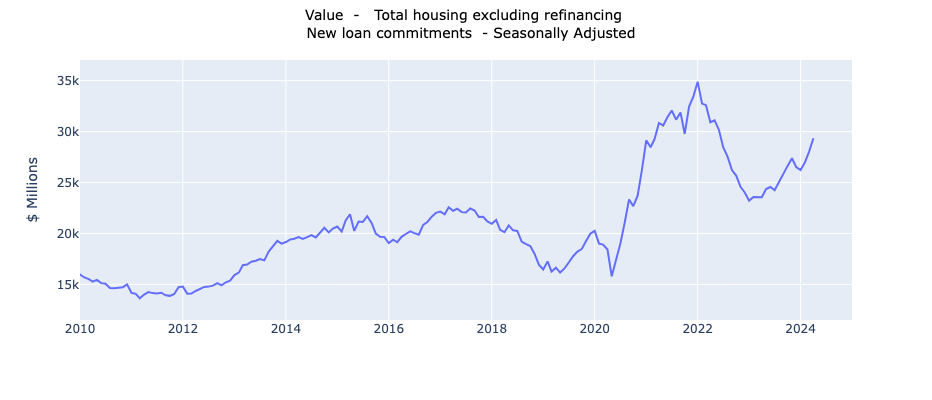

In [312]:
startDateExample = datetime(2010, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A108296973X'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)

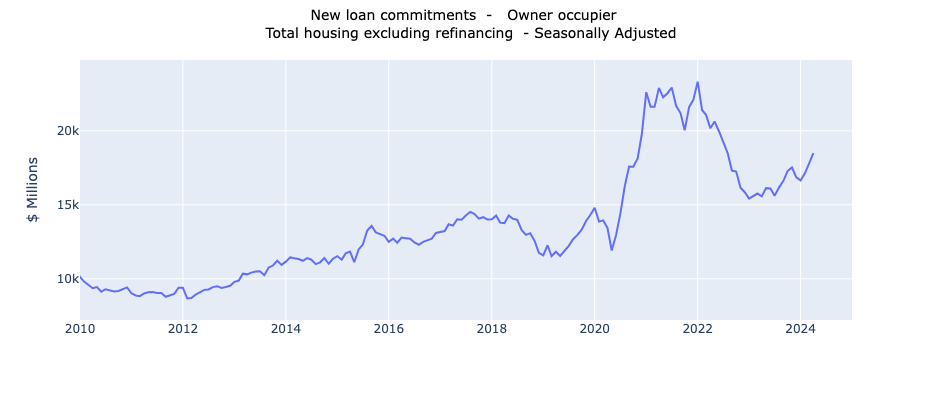

In [313]:
startDateExample = datetime(2010, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A108268693J'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)

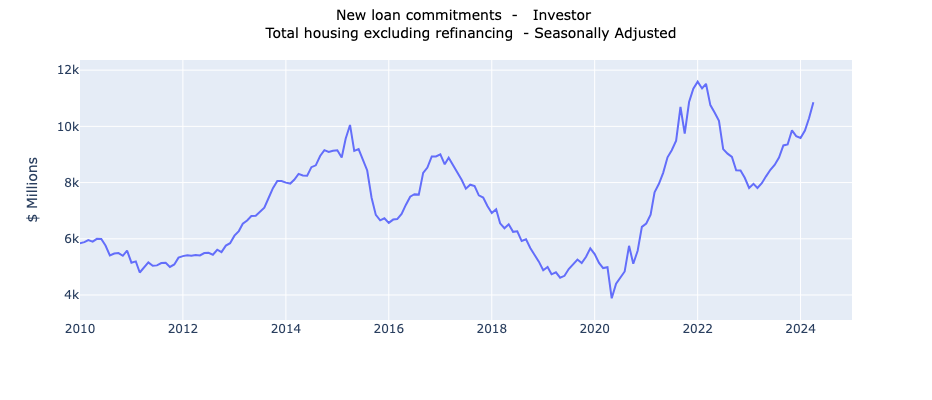

In [314]:
startDateExample = datetime(2010, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A108273775J'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)

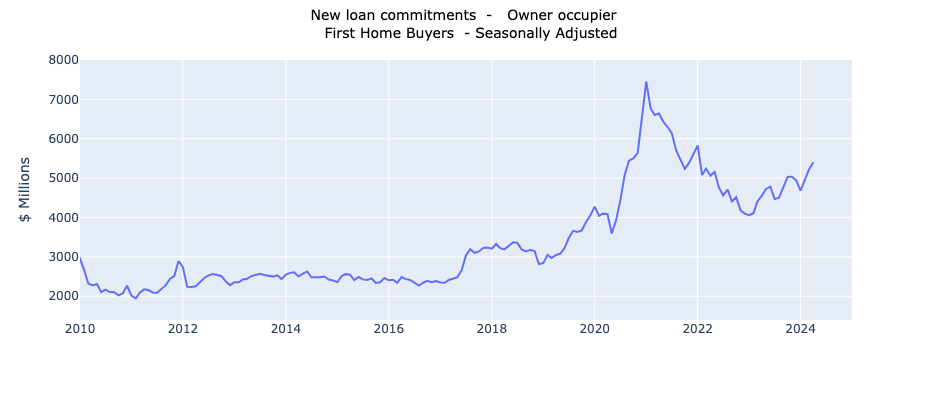

In [315]:
startDateExample = datetime(2010, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A108277457X'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)

